# Predict Profit For food truck

In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('ex1data1.txt')

In [3]:
data.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [4]:
data.columns = ['Population', 'Profit']

In [5]:
data.head()

,Population,Profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [6]:
data.shape

(96, 2)

In [33]:
def plotData(x,y):
    fig = plt.figure()
    plt.plot(x,y, 'ro', ms=10, mec='k')
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')

In [7]:
#Plot the dataset
x = data['Population']
y = data['Profit']

In [8]:
m = y.size

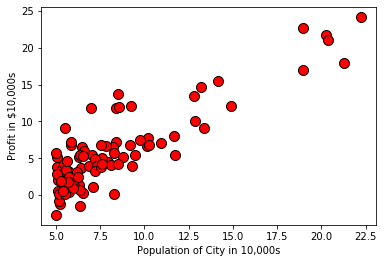

In [10]:
plotData(x,y)

### COst Function

In [11]:
#add one more column of 1
x= np.stack([np.ones(m), x], axis=1)

In [86]:
x.shape

(96, 2)

In [87]:
y.shape


(96,)

In [20]:
#compute cost function
def costFunction(x,y, theta):
    m = y.size
    j = 0
    
    h = np.dot(x, theta)
    
    j = (1/(2*m)) * np.sum(np.square(np.dot(x,theta) - y))
    
    return j

Compute Cost two times using two different initializations of theta.

In [24]:
j = costFunction(x, y, theta=np.array([0.0, 0.0]))
print('theta = [0,0] \nCost Computed = %.2f' %j)

j = costFunction(x,y, theta=np.array([-1, 2]))
print('theta = [-1,2] \nCost Computed = %.2f' %j)


theta = [0,0] 
Cost Computed = 30.79
theta = [-1,2] 
Cost Computed = 54.60


#### Gradient Descent
Vectors and matrices in numpy - Important implementation notes
A vector in numpy is a one dimensional array, for example np.array([1, 2, 3]) is a vector. A matrix in numpy is a two dimensional array, for example np.array([[1, 2, 3], [4, 5, 6]]). However, the following is still considered a matrix np.array([[1, 2, 3]]) since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function np.dot which we will use for all matrix/vector multiplication has the following properties:

It always performs inner products on vectors. If x=np.array([1, 2, 3]), then np.dot(x, x) is a scalar.
For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation np.dot(y, X) considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation np.dot(X, y) considers $y$ as a $n \times 1$ vector.
A vector can be promoted to a matrix using y[None] or [y[np.newaxis]. That is, if y = np.array([1, 2, 3]) is a vector of size 3, then y[None, :] is a matrix of shape $1 \times 3$. We can use y[:, None] to obtain a shape of $3 \times 1$.

In [28]:
def gradientDescent(x,y, theta, alpha, iters):
    m = y.shape[0]
    theta = theta.copy()
    
    #use list to save cost in every iterations
    jHistory = []
    
    for i in range(iters):
#         print("iteration {}".format(i))
        theta = theta -(alpha/m) * (np.dot(x,theta) - y).dot(x)
        
        #save cost in every iterations
        jHistory.append(costFunction(x,y, theta))
        
    return theta, jHistory

#### print the theta

In [46]:
theta = np.zeros(2)

iterations = 1500
alpha = 0.01

theta , jHistory = gradientDescent(x, y, theta, alpha, iterations)
print("Theta is : {:.4f}, {:.4f}".format(*theta))


Theta is : -3.9264, 1.1850


#### Plot the linear fit

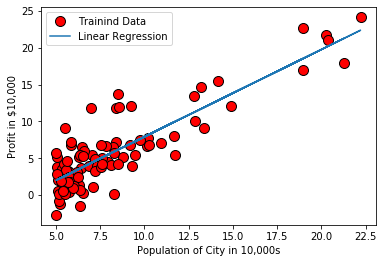

In [47]:
plotData(x[:,1], y)
plt.plot(x[:, 1], np.dot(x, theta), '-')
plt.legend(['Trainind Data', 'Linear Regression'])

### Predict Values for population sizes

In [52]:
predict1 = np.dot([1, 3.5], theta)
print("For 35,000 population, profit is ${:.2f}\n".format(predict1*10000))

predict2 = np.dot([1,6], theta)
print("For 60,000 population, profit is ${:.2f}\n".format(predict2*10000))

For 35,000 population, profit is $2210.46

For 60,000 population, profit is $31835.35



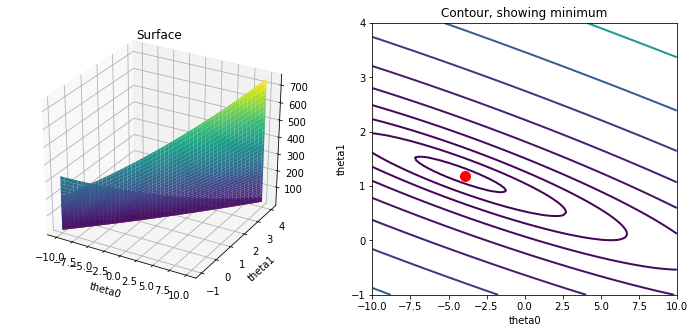

In [93]:
from mpl_toolkits.mplot3d import Axes3D
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = costFunction(x, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

# using sklearn module

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

In [14]:
x_train.shape

(67, 2)

In [61]:
trainer = LinearRegression()

In [63]:
learner = trainer.fit(x,y)

In [64]:
y_actual = y_test

In [65]:
learner

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
learner.predict([[1, 8.5186]])

array([6.12621963])

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
yp = learner.predict(x_test)
ya = y_test

In [72]:
learner.coef_

array([0.        , 1.21354725])

In [73]:
learner.score(x_test, y_test)

0.6343159184220815

In [74]:
import seaborn as sns

In [84]:
x_line = np.arange(5,34).reshape(-1,1)

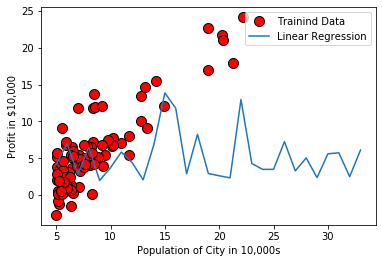

In [85]:
plotData(x[:,1], y)
plt.plot(x_line,yp, '-')
plt.legend(['Trainind Data', 'Linear Regression'])

In [ ]:
a